In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

定義數據路徑

In [4]:
train_data_dir = 'C:/Users/Rebecca/Desktop/Originaldataset/train'
test_data_dir = 'C:/Users/Rebecca/Desktop/Originaldataset/test'

定義數據生成器參數

In [5]:
batch_size = 32
image_size = (397, 381)  # 图像大小

In [6]:
# 創建ImageDataGenerator實例
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

從目錄中讀取數據並生成批次

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # 如果是多分类问题，可以设置为 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 416 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


模型建構

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(397, 381, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


編譯模型

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

顯示模型

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 395, 379, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 197, 189, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1191456)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               152506496 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 152507521 (581.77 MB)
Trainable params: 152507521 (581.77 MB)
Non-trainable params: 0 (0.00 Byte)
________

定義early stopping 函數

In [13]:
# 當驗證集上的損失不再下降時停止訓練，patience參數表示容忍的輪數
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  

訓練模型

In [15]:
history = model.fit(train_generator, epochs=10,validation_data=test_generator,callbacks=[early_stopping]) # 加入early stopping 函數

Epoch 1/10
13/13 [==============================] - 25s 2s/step - loss: 23.6463 - accuracy: 0.6370 - val_loss: 9.2089 - val_accuracy: 0.7404
Epoch 2/10
13/13 [==============================] - 23s 2s/step - loss: 2.6421 - accuracy: 0.8197 - val_loss: 1.1900 - val_accuracy: 0.8654
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 0.3819 - accuracy: 0.8870 - val_loss: 0.6506 - val_accuracy: 0.8558
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 0.1373 - accuracy: 0.9591 - val_loss: 0.3189 - val_accuracy: 0.9038
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 0.0694 - accuracy: 0.9760 - val_loss: 0.2731 - val_accuracy: 0.9231
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 0.0370 - accuracy: 0.9904 - val_loss: 0.2423 - val_accuracy: 0.9231
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 0.0192 - accuracy: 0.9952 - val_loss: 0.2879 - val_accuracy: 0.9135
Epoch 8/10
13/13 [=

用matplotlib繪製訓練過程中的損失(loss)和準確度(accuracy)曲線

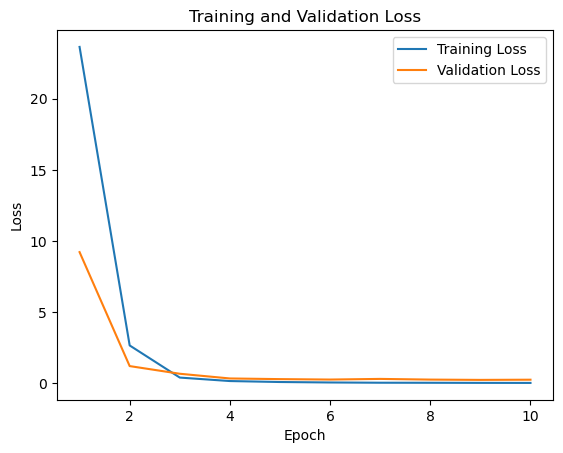

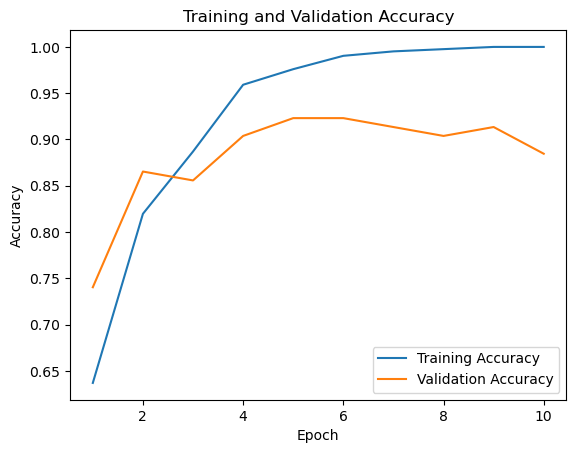

In [16]:
import matplotlib.pyplot as plt

# 從 history 中取得準確度和損失值
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# 設定 x 軸的範圍，從 epoch=1 到最後一個 epoch
epochs = range(1, len(training_accuracy) + 1)

# 繪製損失曲線
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 繪製準確度曲線

plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

epoch = 0 開始 

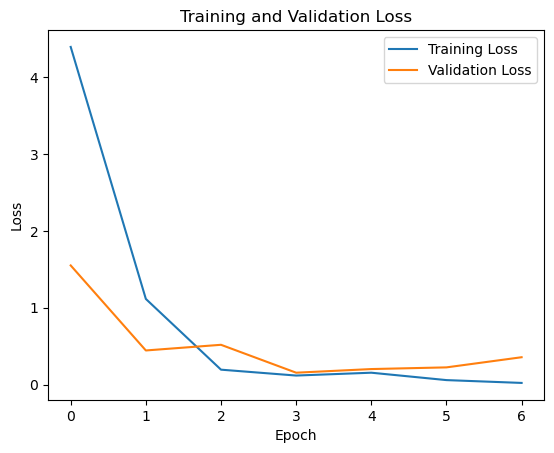

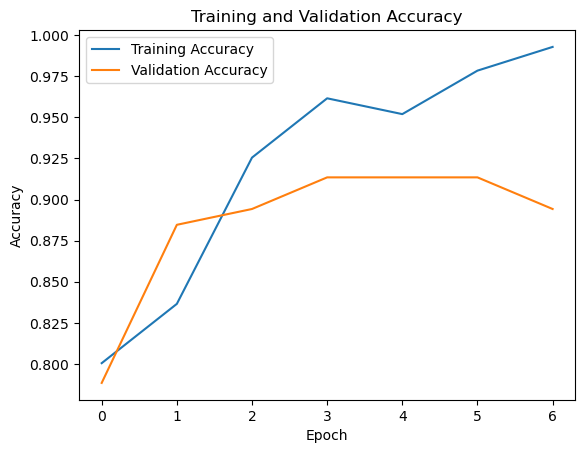

In [25]:
import matplotlib.pyplot as plt


# 從 history 中取得準確度和損失值
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# 設定 x 軸的範圍，從 epoch=1 到最後一個 epoch
epochs = range(1,len(training_accuracy) + 1)


plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#繪製準確度曲線
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

儲存模型

In [17]:
model.save('OriginalDatamodeltest.keras') 

載入model

In [18]:
model = tf.keras.models.load_model('OriginalDatamodeltest.keras')